# Goal
To get a machine learning model that will predict how dangerous the accident (that will occur or has been occured ) is

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score,recall_score,f1_score,confusion_matrix,classification_report

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data=pd.read_csv("accident_data.csv")
data.head()

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,05-06-2019,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,02-07-2019,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,26-08-2019,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,16-08-2019,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,03-09-2019,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle


# Thorough Overview of Data

In [5]:
data.shape

(660679, 14)

In [6]:
data.columns

Index(['Index', 'Accident_Severity', 'Accident Date', 'Latitude',
       'Light_Conditions', 'District Area', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [7]:
data=data.drop(['Index','Accident Date','District Area'],axis=1)
data.columns

Index(['Accident_Severity', 'Latitude', 'Light_Conditions', 'Longitude',
       'Number_of_Casualties', 'Number_of_Vehicles', 'Road_Surface_Conditions',
       'Road_Type', 'Urban_or_Rural_Area', 'Weather_Conditions',
       'Vehicle_Type'],
      dtype='object')

In [8]:
data.describe()

,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,660654.000000,660653.000000,660679.000000,660679.000000
mean,52.553866,-1.431210,1.357040,1.831255
std,1.406922,1.383330,0.824847,0.715269
min,49.914430,-7.516225,1.000000,1.000000
25%,51.490690,-2.332291,1.000000,1.000000
50%,52.315641,-1.411667,1.000000,2.000000
75%,53.453452,-0.232869,1.000000,2.000000
max,60.757544,1.762010,68.000000,32.000000


In [9]:
# Statistical overview of categorical columns
data.describe(include='object')

,Accident_Severity,Light_Conditions,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
count,660679,660679,659953,656159,660664,646551,660679
unique,3,5,5,5,3,8,16
top,Slight,Daylight,Dry,Single carriageway,Urban,Fine no high winds,Car
freq,563801,484880,447821,492143,421663,520885,497992


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660679 entries, 0 to 660678
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Accident_Severity        660679 non-null  object 
 1   Latitude                 660654 non-null  float64
 2   Light_Conditions         660679 non-null  object 
 3   Longitude                660653 non-null  float64
 4   Number_of_Casualties     660679 non-null  int64  
 5   Number_of_Vehicles       660679 non-null  int64  
 6   Road_Surface_Conditions  659953 non-null  object 
 7   Road_Type                656159 non-null  object 
 8   Urban_or_Rural_Area      660664 non-null  object 
 9   Weather_Conditions       646551 non-null  object 
 10  Vehicle_Type             660679 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 55.4+ MB


# Data Cleaning

In [11]:
# Handling missing values
data.isnull().sum().sort_values(ascending=False)

Weather_Conditions         14128
Road_Type                   4520
Road_Surface_Conditions      726
Longitude                     26
Latitude                      25
Urban_or_Rural_Area           15
Accident_Severity              0
Light_Conditions               0
Number_of_Casualties           0
Number_of_Vehicles             0
Vehicle_Type                   0
dtype: int64

In [12]:
data.dropna(subset=['Road_Surface_Conditions','Longitude'],inplace=True)

In [13]:
# Filling columns with the least repeated label
data['Weather_Conditions'].fillna('Snowing + high winds',inplace=True)
data['Road_Type'].fillna('Slip road',inplace=True)
data['Urban_or_Rural_Area'].fillna("Unallocated",inplace=True)

In [14]:
# Removing unallocated values in Urban or Rural Columns
data=data[data['Urban_or_Rural_Area']!='Unallocated']
data['Urban_or_Rural_Area'].value_counts()

Urban_or_Rural_Area
Urban    421220
Rural    238702
Name: count, dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 659922 entries, 0 to 660678
Data columns (total 11 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Accident_Severity        659922 non-null  object 
 1   Latitude                 659922 non-null  float64
 2   Light_Conditions         659922 non-null  object 
 3   Longitude                659922 non-null  float64
 4   Number_of_Casualties     659922 non-null  int64  
 5   Number_of_Vehicles       659922 non-null  int64  
 6   Road_Surface_Conditions  659922 non-null  object 
 7   Road_Type                659922 non-null  object 
 8   Urban_or_Rural_Area      659922 non-null  object 
 9   Weather_Conditions       659922 non-null  object 
 10  Vehicle_Type             659922 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 60.4+ MB


In [16]:
# Encoding Categorical Columns
encoder=LabelEncoder()
data['Urban_or_Rural_Area']=encoder.fit_transform(data['Urban_or_Rural_Area'])
data['Accident_Severity']=encoder.fit_transform(data['Accident_Severity'])
data['Light_Conditions']=encoder.fit_transform(data['Light_Conditions'])
data['Road_Surface_Conditions']=encoder.fit_transform(data['Road_Surface_Conditions'])
data['Road_Type']=encoder.fit_transform(data['Road_Type'])
data['Weather_Conditions']=encoder.fit_transform(data['Weather_Conditions'])
data['Vehicle_Type']=encoder.fit_transform(data['Vehicle_Type'])
data.head()

,Accident_Severity,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,1,51.506187,1,-0.209082,1,2,0,3,1,1,2
1,1,51.495029,4,-0.173647,1,2,4,3,1,5,2
2,1,51.517715,0,-0.210215,1,3,0,4,1,6,14
3,1,51.495478,4,-0.202731,1,4,0,3,1,1,1
4,2,51.488576,1,-0.192487,1,2,0,4,1,6,11


In [17]:
# Saving the trained label Encoder for further usage
import pickle
pickle.dump(encoder,open("LableEncoder.pkl","wb"))

In [18]:
# Scaling X
scaler=StandardScaler()
for each in data.columns:
    if each !='Accident_Severity':
       data[each]=scaler.fit_transform(data[[each]])
    else:
        pass

data.head()

,Accident_Severity,Latitude,Light_Conditions,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,1,-0.743981,-1.877353,0.883385,-0.432935,0.235734,-0.675408,0.488905,0.752789,-0.463435,-0.430932
1,1,-0.751909,0.561543,0.908993,-0.432935,0.235734,1.546180,0.488905,0.752789,2.052262,-0.430932
2,1,-0.735791,-2.690319,0.882566,-0.432935,1.633579,-0.675408,1.391478,0.752789,2.681186,2.767761
3,1,-0.751590,0.561543,0.887975,-0.432935,3.031424,-0.675408,0.488905,0.752789,-0.463435,-0.697489
4,2,-0.756494,-1.877353,0.895378,-0.432935,0.235734,-0.675408,1.391478,0.752789,2.681186,1.968088


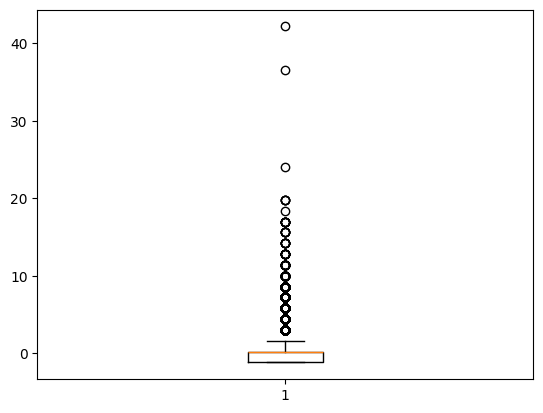

In [19]:
# Handling Outliers: Number of Vehicles column with outliers
plt.boxplot(data['Number_of_Vehicles'])
plt.show()

In [20]:
# Removing outliers of Number of Vehicles Column
print(data.shape)
data=data[data['Number_of_Vehicles']<=3]
print(data.shape)


(659922, 11)
(644840, 11)


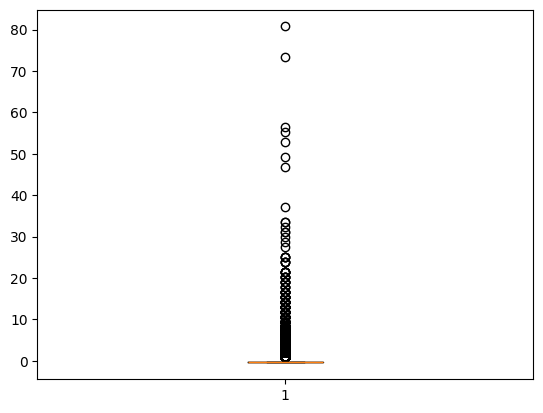

In [21]:
# Handling Outliers: Number of Vehicles column with outliers
plt.boxplot(data['Number_of_Casualties'])
plt.show()

In [22]:
# Removing outliers of Number of Casualties Column
print(data.shape)
data=data[data['Number_of_Casualties']<=35] # kept 35 as threshold as upper data may be useful.
print(data.shape)

(644840, 11)
(644832, 11)


# Data Distribution

In [23]:
X=data.drop("Accident_Severity",axis=1)
y=data['Accident_Severity']
X.shape,y.shape

((644832, 10), (644832,))

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.85,random_state=42)

# Best Model Selection

In [25]:
from sklearn.metrics import accuracy_score
best_model=np.nan
best_accuracy=0

In [ ]:
# Checking logistic Regression
model1=LogisticRegression()
model1.fit(X_train,y_train)
y_pred=model1.predict(X_test)
model1_accuracy=accuracy_score(y_pred,y_test)
if model1_accuracy>best_accuracy:
    best_accuracy=model1_accuracy
    best_model=model1

In [ ]:
# Checking Decission Tree
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)
y_pred=model2.predict(X_test)
model2_accuracy=accuracy_score(y_pred,y_test)
if model2_accuracy>best_accuracy:
    best_accuracy=model2_accuracy
    best_model=model2

In [ ]:
# Checking Random Forest
model4=RandomForestClassifier()
model4.fit(X_train,y_train)
y_pred=model4.predict(X_test)
model4_accuracy=accuracy_score(y_pred,y_test)
if model4_accuracy>best_accuracy:
    best_accuracy=model4_accuracy
    best_model=model4

In [ ]:
# Checking AdaBoost Classifier
model5=AdaBoostClassifier()
model5.fit(X_train,y_train)
y_pred=model5.predict(X_test)
model5_accuracy=accuracy_score(y_pred,y_test)
if model5_accuracy>best_accuracy:
    best_accuracy=model5_accuracy
    best_model=model5

In [ ]:
# Checking KNeighbours Classifier
model6=KNeighborsClassifier()
model6.fit(X_train,y_train)
y_pred=model6.predict(X_test)
model6_accuracy=accuracy_score(y_pred,y_test)
if model6_accuracy>best_accuracy:
    best_accuracy=model6_accuracy
    best_model=model6

# Out of 5 models i tested, the logistic regression gave best accuracy of 85.27% on unseen data.

In [40]:
# saving best model
pickle.dump(best_model,open("best_model.pkl",'wb'))